# CH1. 탐색적 데이터 분석

## 1.1 정형화된 데이터의 요소

###### 정형 데이터의 가장 기본이 되는 종류: 수치형 데이터, 범주형 데이터
(1) 수치형 데이터(Numeric)
 - 연속형(Continuous), 이산형(Discrete)
 
(2) 범주형 데이터(categorical): 범위가 정해진 값
 - 이진 데이터(binary, 범주형 데이터 중에서도 두 값중 하나를 갖는 특수한 경우. ex) 0/1, 예/아니오)
 - 순서형 (ordial, ex.평점)

## 1.2 테이블 데이터

* 엑셀 스프레드시트나 데이터베이스의 테이블과 같은 rectagular data

###### 용어정리
- Data frame: 통계와 ML 모델에서 가장 기본이 되는 테이블 형태의 데이터 구조
- feature: 일반적으로 테이블의 각 열이 하나의 피처를 의미 (유의어: 특징, 속성, 입력, 예측변수(predictor), 변수)
- outcome(결과): 데이터 과학 프로젝트의 목표는 대부분 어떤 결과를 예측하는 데 있다. 실험이나 연구에서 결과를 예측하기 위해 피처를 사용ㅇ한다. (유의어: 종속변수, 응답, 목표(target), 출력)
- record: 일반적으로 테이블의 각 행(row)은 하나의 레코드를 의미 (유의어: 기록값, 사건(case), 사례, 예제, 관측값, 패턴, 샘플)

### 1.2.1 데이터 프레임과 인덱스
* 인덱스를 통해 쿼리 성능의 향상 가능
- python: 기본 테이블형 데이터 구조를 위해 DataFrame 객체를 제공하며, DataFrame에서 각 행마다 순차적으로 정수인 값을 붙여 인덱스로 사용. +pandas는 다중/계층적 인덱스 지원
- r: data.frame 객체 제공하며, 내부적으로 행 번호에 따라 정수로 된 인덱스를 갖는다. 다만, 다중 인덱스를 지원하지 않기에 이를 보완하기 위해 data.table과 dplyr이 현재 널리 사용된다. 모두 다중인덱스를 지원한다.

### 1.2.2 테이블 형식이 아닌 데이터 구조
- 시계열 데이터
- 그래프(혹은 네트워크) 데이터
- 공간 데이터 등..

## 1.3 위치 추정
* 데이터가 주어졌을 때, 데이터를 살펴보는 가장 기초적인 단계는 각 피처(변수)의 '대푯값(typical value)'를 구하는 것

###### 용어정리
- 평균(mean): 모든 값의 총합을 갯수로 나눈 값 (유의어: average)
- 가중평균(weighted mean): 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값 (유의어: 가중평균(weighted average)
- 중간값(median): 데이터에서 가장 가운데 위치한 값 (유의어: 50번째 백분위수(percentile)
- 백분위수(percentile): 전체 데이터의 P%를 아래에 두는 값 (유의어: 분위수(quantile))
- 가중 중간값(weighted median): 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
- 절사평균(trimmed mean): 정해진 갯수의 극단값(extreme value)을 제외한 나머지 값들의 평균 (유의어: 절단평균(truncated mean))
- 로버스트하다(robust): 극단값들에 민감하지 않다는 것을 의미 (유의어: 저항성이 있다(resistant))
- 특잇값(outlier): 대부분의 값과 매우 다른 데이터 값 (유의어: 극단값)

### 1.3.1 평균
- 평균(x bar)
- 절사평균: 극단값의 영향을 제거. 평균과 중앙값의 절충안. 데이터의 특잇값들에 로버스트하지만 위치 추정을 위해 더 많은 데이터를 사용함.
- 가중평균: 1. 어떤 값들이 본래 다른값에 비해 큰 변화량을 가질 때. 2. 데이터 수집시 정보의 비대칭성을 보정하기 위해

### 1.3.2 중간값과 로버스트
- 중간값: 특잇값의 영향을 받지 않으므로 로버스트한 추정 방법
- 가중 중간값: 마찬가지로 특잇값에 로버스트
- 특이값(극단값): 데이터 집합에서 다른 값들과 매우 멀리 떨어져 있는 값. (관습적으로 사용하는 특잇값의 정의가 있지만, 정확한 정의는 다소 주관적일 수 있다.)



## 1.3.3 예제: 인구에 다른 살인 비율의 위치 추정

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

In [5]:
# state: 주별 인구와 살인 비율을 담고 있는 데이터 프레임
state = pd.read_csv('C:/data/stats_for_ds/state.csv') ;state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [14]:
print('평균: ', state['Population'].mean())
print('절사평균: ', stats.trim_mean(state['Population'], 0.1)) # 0.1: 각 끝에서 10% 제외
print('중앙값(median): ', state['Population'].median())

평균:  6162876.3
절사평균:  4783697.125
중앙값(median):  4436369.5


평균>중앙값>절사평균

In [2]:
import wquantiles

'''
https://anaconda.org/conda-forge/wquantiles
'''

'\nhttps://anaconda.org/conda-forge/wquantiles\n'

In [36]:
print('가중평균: ', np.average(state['Murder.Rate'], weights=state['Population']))
print('가중 중앙값: ', wquantiles.median(state['Murder.Rate'], weights=state['Population']))

가중평균:  4.445833981123393
가중 중앙값:  4.4


## 1.4 변이추정
* 변이(variablility): 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도(dispersion)를 나타냄
* 변이를 측정하고, 이를 줄이고, 실제 변이와 랜덤을 구분하고, 실제 변이의 다양한 요인들을 알아보고, 변이가 있는 상황에서 결정을 내리는 등, 통계의 핵심에 이 변이가 있다

###### 용어정리
- 편차(deviation): 관측값과 위치 추정값 사이의 차이 (유의어: 오차, 잔차)
- 분산(variation): 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값. n은 데이터 갯수 (유의어: 평균제곱오차)
- 표준편차(standard deviation): 분산의 제곱근
- 평균절대편차(mean absolute deviation): 평균과의 편차의 절댓값의 평균 (유의어: l1 노름, 맨해튼 노름)
- 중간값의 중위절대편차(MAD, median absolute deviation from the median): 중간값과의 편차의 절댓값의 중간값
- 범위(ragne): 최댓값과 최솟값의 차이
- 순서통계량(order statistics): 최소에서 최대까지 정렬된 데이터 값에 따른 계량형 (유의어: 순위)
- 백분위수(percentile): 어떤 값들의 P퍼센트가 이 값 혹은 더 작은 값을 갖고, (100-P)퍼센트가 이 값 혹은 더 큰 값을 갖도록 하는 값(유의어: 분위수)
- 사분위범위(IQR, interquartile range): 75번째 백분위수와 25번째 백분위수 사이의 차이

### 1.4.1 표준편차와 관련 추정값들 
* 표준편차는 원래 데이터와 같은 척도(scale)에 있기 때문에 분산보다 훨씬 해석하기 쉽다.
* 분산, 표준편차, 평균절대편차 모두 특잇값과 극단값에 로버스트 하지 않다.
* 분산과 표준편차는 제곱편차를 사용하기 때문에 특히 특잇값에 민감

* 중앙값의 중위절대편차(MAD): 로버스트한 변이 추정값

### 1.4.2 백분위수에 기초한 추정 
* 범위는 특잇값에 매우 민감하여 데이터의 변이를 측정하는데 그렇게 유용하지는 않다.
* 사분위범위는 양극단값을 제거함으로써 로버스트한 변이 추정의 대표적인 방법
* 데이터 집합이 매우 클 경우, 정확한 백분위수를 계산하기 위해 모든 값을 정렬하는 것은 매우 많은 연산을 필요로 한다. 따라서, ML과 통계 소프트웨어는 백분위수의 근삿값을 사용하여 빠르고 어느정도의 정확도를 보장한다.

## 1.4.3 예제: 주별 인구의 변이 추정

In [3]:
from statsmodels import robust

In [33]:
print('표준편차(std): ', state['Population'].std())
print('사분위범위(IQR): ', state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print('중위절대편차(MAD): ', robust.scale.mad(state['Population']))

표준편차(std):  6848235.347401142
사분위범위(IQR):  4847308.0
중위절대편차(MAD):  3849876.1459979336


###### 21.09.24

### 1.5 데이터 분포 탐색하기

<br>

<용어정리>
 - 상자그림(boxplot): 투키가 데이터의 분포를 시각화하기 위한 간단한 방법으로 소개한 그림. (유의어: 상자수염도)
 - 도수분포표(frequency table): 어떤 구간(interval, bin)에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
 - 히스토그램(histogram): x축은 구간들을, y축은 빈도수를 나타내는 도수 테이블의 그림. 시각적으로 비슷하지만 막대 그래프를 히스토그램과 혼동해서는 안 된다. 차이점에 대한 설명은 1.6절 참조
 - 밀도 그림(density plot): 히스토그램을 부드러운 곡선으로 나타낸 그림. 커널밀도추정(kernel density estimation)을 주로 사용한다.

#### 1.5.1 백분위수와 상자그림

 - 백분위수는 데이터의 흩어진 정도 뿐 아니라 분포를 알아보는데에도 유용하다
 - 주로 사분위수(25, 50, 75번째 백분위수)나 십분위수(decile)(10, 20, ... 90번째 백분위수)를 사용
 - 특히 백분위수는 꼬리(tail)부분(외측 범위)을 묘사하는데 제격

<br>

 - 상자그림은 백분위수를 이용해 데이터의 분산을 쉽게 시각화 하는 방법


In [7]:
# 백분위수
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

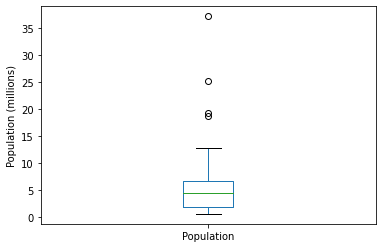

In [11]:
# 상자그림 (pandas에서 제공하는 df에 대한 탐색 플롯)
ax = (state['Population']/1_000_000).plot.box() 
ax.set_ylabel('Population (millions)')

'''
상자그림의 위, 아래: 75%, 25% 백분위수
상자그림 중간 수평선: 중앙값(50% 백분위수)
구렛나루처럼 위아래로 나 있는 점선: 수염(whisker), 데이터 전체의 범위를 나타내주는 선
수염보다 더 바깥쪽에 위치한 데이터: 특잇값
'''

#### 1.5.2 도수분포표와 히스토그램
<br>

 - 도수분포표: 변수의 범위를 동일한 구간으로 나눈 다음, 각 구간마다 몇 개의 변숫값이 존재하는지를 보여주기 위해 사용  <br>
 - 구간의 크기가 너무 크면 분포를 나타내는 중요한 특징을 놓칠 수 있다.  <br>
 - 구간의 크기가 너무 작으면 큰 그림을 볼 수 없다.  <br>
 - 따라서, 구간의 크기를 바꿔보는 것도 유ㅇ용한 정보를 얻는 좋은 정보 <br><br>
 
 - 히스토그램은 도수분포표를 시각화하는 방법
 - x축: 구간, y축: 구간별 데이터 갯수

- 히스토그램이 담고있는 정보 <br>
: 그래프에 빈 구간들이 있을 수 있다. <br>
: 구간은 동일한 크기를 갖는다. <br>
: 구간의 수(혹은 구간의 크기)는 사용자가 결정할 수 있다. <br>
: 빈 구간이 있지 않은 이상, 막대 사이는 공간 없이 서로 붙어있다. <br>

###### TIP. 통계학에서 말하는 모멘트 <br>
: 통계학 이론에서 위치와 변이는 각각 분포의 일차 및 이차 모멘트(moment, 또는 적률)라고 한다.<br>
: 삼차, 사차 모멘트는 각각 왜도(skewness), 첨도(kurtosis) <br>
: 이러한 모멘트 값들은 직접 구하기보다 시각화를 통해 확인 <br><br>

- 왜도: 데이터가 큰값/작은값 쪽으로 얼마나 비스듬히 쏠려있는지 <br>
- 첨도: 데이터가 극단값을 갖는 경향성

In [13]:

binnedPopulation = pd.cut(state['Population'], 10); binnedPopulation

# pd.cut: 값들을 각 구간에 매핑하는 시리즈를 만듦

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [15]:
binnedPopulation.value_counts() 

# value_counts를 이용하여 빈도 테이블을 구함

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

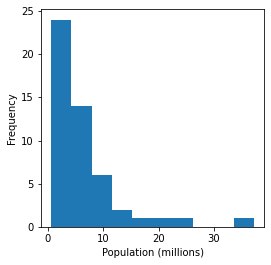

In [17]:
#### 히스토그램
ax = (state['Population']/1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

#### 1.5.3 밀도 그림과 추정

- 밀도그림은 데이터의 분포를 연속된 선으로 보여준다.(즉, 부드러운 히스토그램) <br>
- 커널밀도추정을 통해 데이터로부터 직접 계산 <br> <br>

- 히스토그램과 가장 큰 차이는 y축 값의 단위 <br>
- 밀도 그림에서는 갯수가 아닌 비율을 표시함. <br> <br>

- 밀도 곡선 아래의 총 면적은 1이고 구간의 갯수 대신 x축의 두 점 사이의 곡선 아래 면적을 계산하면 이는 두 점 사이에 있는 분포의 비율에 해당

##### TIP. 밀도추정 (p.45)

C:\Users\minjw\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'Murder Rate (per 100,000)')

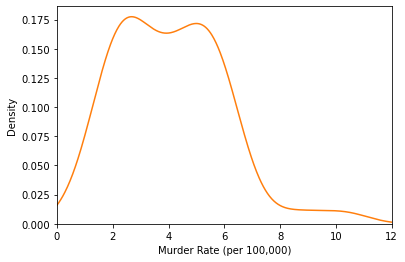

In [20]:
# pandas는 밀도 그림을 생성하기 위해 density 메서드를 제공한다.
# 밀도 곡선의 부드러움을 제어하기 위해 bw_method인수 사용

ax = state['Population'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

###### <주요개념> 
- 도수 히스토그램은 y축에 횟수를, x축에 변숫값들을 표시하고 하눈ㄴ에 데이터의 분포를 볼 수 있다. <br>
- 도수분포표는 히스토그램에 보이는 횟수들을 표 형태로 나타낸 것이다.
- 상작그림에서 상자의 위/아래 부분은 각각 75%/25% 백분위수를 의미하며, 이것 역시 데이터의 분포를 한 눈에 파악할 수 있도록 돕는다. 주로 분포들을 서로 비교하기 위해 사용된다. (상자에 전체의 50% 데이터가 포함되어있다)
- 밀도 그림은 히스토그램의 부드러운 버전. 데이터로부터 이 그림을 얻기 위해서는 어떤 함수를 구해야 하는데 여러 가지 가능한 추정 방법이 있다.


### 1.6 이진 데이터와 범주 데이터 탐색하기
- 범주형 데이터에서는 간단한 비율이나 퍼센트를 이용해 데이터에 관해 이야기할 수 있음 <br>

###### <용어정리>
- 최빈값(mode): 데이터에서 가장 자주 등장하는 범주 혹은 값  <br>
- 기댓값(expected value): 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현 확률(probability)에 따른 평균 <br> <br>
- 막대도표(bar chart): 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림 <br>
- 파이그림(pie chart): 각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 나타낸 그림  <br>

- 막대도표는 히스토그램과 매우 유사
<br>

- 막대도표의 x축은 각 요인 변수(factored variable)의 서로 다른 범주들을 나타내는 반면, <br>
- 히스토그램의 x축은 수치적으로 나타낼 수 있는 하나의 변수 값을 의미<br>
<br>

- 히스토그램에서 막대들은 일반적으로 서로 붙어 있고, 중간에 틈이 있으면 그 부분에 해당하는 값들이 존재하지 않음을 의미<br>
- 막대도표에서는 막대들이 서로 떨어져있음

###### NOTE_ 범주형 데이터로서의 수치 데이터
도수분포의 표는 엄밀히 말해 수치데이터를, 순서를 고려한 요인(factor)들로 변환했다고 볼 수 있다. 이런 관점에서, 히스토그램과 막대도표는 비슷하다고 할 수 있다. 막대도표에서 x축의 범주들이 순차적이지 않다는 점만 제외한다면 말이다. 이런 수치형 데이터를 범주형으로 변환하는 것은 데이터의 복잡도(그리고 크기)를 줄여준다는 점에서 중요하고 실제 많이 사용된다. 특히, 데이터 분석을 시작하는 단계에서, 피처들 사이의 관계를 알아보기 위해 사용된다.


In [24]:
# dfw: 댈러스-포트워스 공항에서 매년 발생하는 항공기 지연의 원인과 그 횟수
dfw = pd.read_csv('C:/data/stats_for_ds/dfw_airline.csv') ;dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

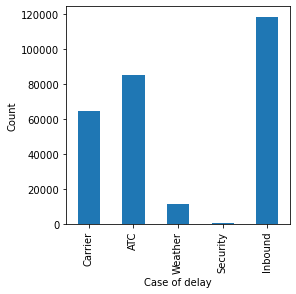

In [25]:
ax=dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Case of delay')
ax.set_ylabel('Count')

#### 1.6.1 최빈값

#### 1.6.2 기댓값

- 기댓값 = sum(각 결과값 * 해당 결과값의 발생 확률) <br> <br>

- 기대값은 가중평균과 같은 꼴. 보통 주관적인 평가에 따른 미대의 기댓값과 각 확률 가중치만큼을 모두 더한 값

#### 1.6.3 확률
- 확률의 개념을 정의하는데 철학적 토론을 하게 되지만 이 책에서는 '상황이 수없이 반복될 경우 사건이 발생할 비율'이라고 설명

###### 주요개념
- 범주형 데이터는 보통 비율로 요약할 수 있고, 막대도표를 사용해 시각화한다. <br>
- 범주란 전혀 다른 집합(사과와 오렌지, 여자와 남자 등), 정도를 나타내는 요인변수의 수준(낮음, 중간, 높음), 구간별로 나뉜 수치데이터 같은 것들을 의미한다.<br>
- 기댓값은 어떤 값과 그 값이 일어날 확률을 서로 곱해 총합한 값을 의미. 주로 요인변수의 수준을 요약하는데 사용

### 1.7 상관관계

###### <용어정리>
- 상관계수(correlation coefficient): 수치적 변수들 간에 어떤 관계가 있는지를 나타내기 위해 사용되는 측정량 (-1 ~ 1 의 범위) <br>
- 상관행렬(correlation matrix): 행과 열이 변수들을 의미하는 표를 말하며, 각 셀은 그 행과 열에 해당하는 변수들 간의 상관관계를 의미 <br>
- 산점도(scatter plot): x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표

![correlation](C:/Users/minjw/study_note/correlation.png)

In [27]:
Image('C:/Users/minjw/study_note/correlation.png')

NameError: name 'Image' is not defined

- 변수들이 선형 관계를 갖지 않는 경우, 더이상 유용한 지표가 아니다. <br><br>

- 상관계수 행렬의 대각원소는 모두 1이며, 대각원소를 기준으로 대칭행렬이다.<br>
- 상관행렬을 이용해 여러 변수들 사이의 관계를 시각화하는 데 사용한다.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sp500_px = pd.read_csv('C:/data/stats_for_ds/sp500_data.csv',index_col=0); sp500_px

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [34]:
sp500_sym = pd.read_csv('C:/data/stats_for_ds/sp500_sectors.csv'); sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [36]:
etfs=sp500_px.loc[sp500_px.index>'2012-07-01',
                 sp500_sym[sp500_sym['sector']=='etf']['symbol']] ;etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.400000,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.520000,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.560000,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.800000,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.480000,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000
2015-06-30,-0.480000,-0.419998,-1.369996,-1.168887,0.130005,0.889999,0.139999,-0.338568,-0.169998,-0.430001,-0.310001,-0.270001,0.259999,-0.510002,-0.580002,-0.150002,-0.269996


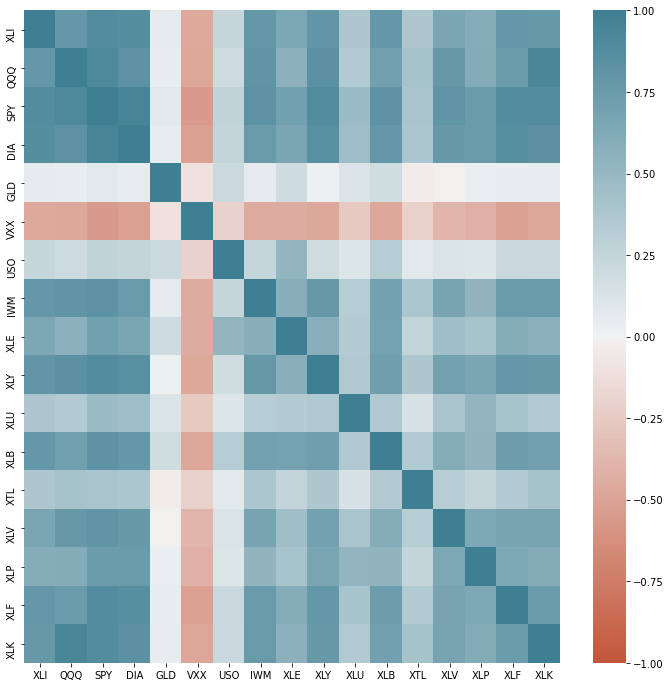

In [41]:
plt.figure(figsize=(12, 12))
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
           cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

#### 1.7.1 산점도
- 두 변수 사이의 관계를 시각화하는 가장 기본적인 방법 <br>
- x, y축은 각각의 변수들을 의미하고 그래프의 각 점은 하나의 레코드를 의미

In [42]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


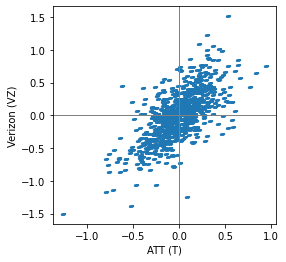

In [48]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$/u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

###### 주요개념
- 상관계수는 두 변수 사이(예를 들어, 개인의 키와 몸무게)에 서로 어떤 관계가 있는지를 측정한다.
- v1이 높아질 때 v2도 높아지고, v1이 낮아질 때 v2도 낮아지는 경우 양의 상관관계가 있다고 한다.
- 반대의 경우 음의 상관관계가 있다고 한다.
- 상관관계는 표준화된 측정 지표라고 할 수 있다. 항상 그 값이 -1(완전 음의 상관관계)에서 +1(완전 양의 상관관계) 사이에 존재한다.
- 상관계수가 0이라는 것은 아무런 상관성이 없음을 의미한다. 하지만 데이터를 랜덤하게 재배치하면 우연히 상관계수가 양수나 음수가될 수도 있다는 점을 알고 있어야 한다.


### 1.8 두 개 이상의 변수 탐색하기
- 일변량분석(univariate analysis): 한 번에 하나의 변수를 다룸 (ex. 평균, 분산) <br>
- 상관분석은 두 변수(이변량분석, bivariate analysis)를 비교할 때 중요한 방법 <br> <br>

- 이번 절에서는 이에 관한 추정법과 도표를 살펴보고 셋 이상의 변수(다변샹분석, multivariage analysis)를 다루는 법도 살펴본다.

<br>

###### <용어정리>
- 분할표(contingency table): 두 가지 이상의 범주형 변수의 빈도수를 기록한 표 <br>
- 육각형 구간(hexagonal binning): 두 변수를 육각형 모양의 구간으로 나눈 그림 <br>자그림과 비슷하지만 밀도추정을 함께 보여준다.
- 등고 도표(contour plot): 지도상에 같은 높이의 지점을 등고선으로 나타내는 것처럼, 두 변수의 밀도를 등고선으로 표시한 도표 <br>
- 바이올린 도표(violin plot): 상자그림과 비슷하지만 밀도추정을 함께 보여준다.


#### 1.8.1 육각형 구간과 등고선(수치형 변수 대 수치형 변수를 시각화)
- 산점도는 데이터가 많아지면 알아보기 어려움 -> 다른 방법 필요

In [49]:
kc_tax = pd.read_csv('C:/data/stats_for_ds/kc_tax.csv'); kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [50]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


##### 육각형 그림
- 점으로 표시하는 대신 기록값을 육각형 모양의 구간들로 나누고 각 구간에 포함된 기록값의 갯수에 따라 색깔을 표시. 

Text(0, 0.5, 'Tax Assessed Value')

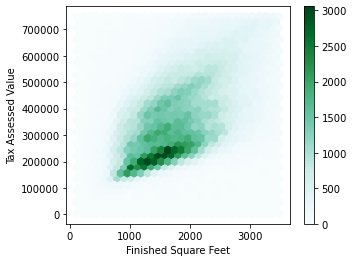

In [52]:
# [그림 1-8] 집의 크기와 과세 평가액을 나타낸 육각형 구간 도표
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

'''
양의 상관관계를 갖음을 파악할 수 있다.
주요그룹부분(가장 어둡고 아래쪽에 있는) 위쪽에 또 하나의 그룹이 있다.
'''

##### 등고선
- 그림 1-9는 두 수치형 변수 사이의 관계를 시각화하기 위해 산점도 위에 등고선을 사용
- 이 등고선은 두 변수로 이루어진 지형에서의 등고선을 의미.
- 등고선 위의 점들은 밀도가 같다.
- '꼭대기'쪽으로 갈수록 밀도는 높아진다. 

KeyboardInterrupt: 

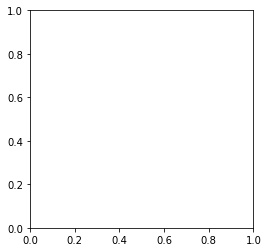

In [54]:
# [그림 1-9] 집의 크기와 과세 평가액을 나타낸 등고선 도표
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

'''
육각형그림과 같이 주요 봉우리 위에 두번째 봉우리가 보인다.
'''

- 두 수치형 변수의 관계를 나타내는 또 다른 도표로 히트맵(Heatmap)이 있다. 
- 히트맵, 육각구간, 등고도표 모두 이차원상의 밀도를 시각화하는데 사용된다.

#### 1.8.2 범주형 변수 대 범주형 변수
- 분할표: 범주별 빈도수를 기록한 표

In [55]:
lc_loans = pd.read_csv('C:/data/stats_for_ds/lc_loans.csv'); lc_loans 

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [56]:
# 대출 등급과 상황에 따른 분할표
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)


status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [57]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


#### 1.8.3 범주형 변수 대 수치형 변수

In [58]:
airline_stats = pd.read_csv('C:/data/stats_for_ds/airline_stats.csv'); airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


Text(0.5, 0.98, '')

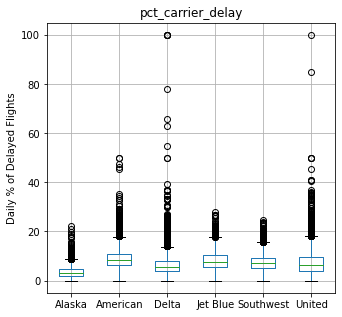

In [60]:
# 항공기 원인에 따른 지연 비율
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', #by 인수를 이용하여 그룹별로 분할하고 그룹별 상자그림 생성
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')


- 바이올린 도표는 상자그림을 보완한 형태로, y축을 따라 밀도추정 결과를 동시에 시각화
- 바이올린 도표의 장점은 상자그림에서는 보이지 않는 데이터의 분포를 볼 수 있다는 점
- 한편, 상자글미은 데이터의 특잇값들을 좀 더 명확히 보여줌

Text(0, 0.5, 'Daily % of Delayed Flights')

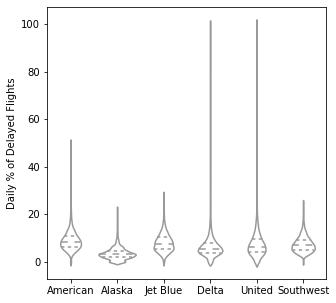

In [62]:
# 항공기 원인에 따른 운항 지연 비율을 나타내는 바이올린 도표
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

#### 1.8.4 다변수 시각화하기

- 조건화(conditioning) 개념을 통해 두 변수 비교용 도표(산점도, 육각형 구간, 상자그림)를 더 여러 변수를 비교하는 용도로 확장하여 활용 가능

'\n1. 조건 변수를 지정하려면 col 및 row 인수를 사용한다. 단일 조건 변수의 경우 col_wrap과 함께 col을 사용하여 패싯 그래프를 여러 행으로 래핑한다.\n2. map 메서드는 다른 우편번호에 대한 원래 데이터 집합의 서브셋에 대해 hexbin 함수를 호출한다. extent는 x축과 y축의 한계를 정의한다.\n'

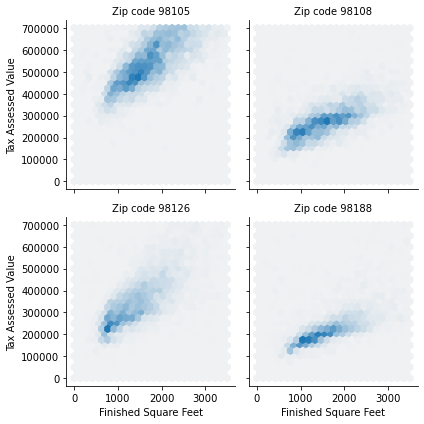

In [64]:
# 우편번호에 따른 과세 평가액 대 실 제곱피트
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

'''
1. 조건 변수를 지정하려면 col 및 row 인수를 사용한다. 단일 조건 변수의 경우 col_wrap과 함께 col을 사용하여 패싯 그래프를 여러 행으로 래핑한다.
2. map 메서드는 다른 우편번호에 대한 원래 데이터 집합의 서브셋에 대해 hexbin 함수를 호출한다. extent는 x축과 y축의 한계를 정의한다.
'''